# Data Analysis and Preprocessing

In [1]:
# import all neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import socket
import struct
import geopandas as gpd
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [2]:
from logger import SetupLogger
from graphical_view import DataVisualizer
from data_loader import DataLoader 
from Geo_analayzer import GeolocationAnalyzer  


logger = SetupLogger(log_file='../logs/eda_log.log').get_logger()

In [3]:
preprocessor = DataLoader(filepath = "../data/Fraud_Data.csv", logger=logger)

**Loding the dataset**

In [4]:
# Loading the dataset
fraud_df = preprocessor.load_dataset()

**Understand the data feature**

In [5]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
# Dataset information
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


**Data Cleaning**

- handle missing values
- convert data types
- handle duplicates

In [7]:
# Check for missing values in the dataset
missing_values = fraud_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values in Each Column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
No missing values found in the dataset.


**Short summary:**

- Missing Values: No missing values found in the dataset.

- Data Types: All data types are correct except for signup_time and purchase_time, which are currently of type object.

- Conversion: The signup_time and purchase_time columns will be converted to standard datetime format.

**Conversion to Datetime Format**

- the signup_time and purchase_time will be converted to standard datetime formatas following code:

In [8]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'], errors='coerce')
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'], errors='coerce')

# Verify the data types after conversion
print("Data Types After Conversion:")
print(fraud_df.dtypes)

Data Types After Conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [9]:
# Check for duplicate rows in the DataFrame
duplicate_count = fraud_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count:
    fraud_df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


**Short summary**

- All data types are now in the appropriate format after conversion.

- Specifically, signup_time and purchase_time have been successfully converted to standard datetime format.

- No duplicated rows in the dataset

**Summary Statistics**

- understand the statistical summary of the dataset as follows

In [10]:
# Summary Statistics of numerical features
fraud_df.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


**Short Summary**

- Data Overview: The dataset contains 151,112 records with the following features:

    - user_id: Ranges from 2 to 400,000, with a mean of 200,171.04.

    - purchase_value: Ranges from 9 to 154, with a mean of 36.94 and a standard deviation of 18.32.

    - age: Ranges from 18 to 76, with a mean of 33.14 and a standard deviation of 8.62.

    - ip_address: Values range significantly, indicating a wide geographical distribution.

    - class: Binary variable with a mean of 0.09, suggesting a low prevalence of the positive class.

In [11]:
# Statistical summary of object data features
fraud_df.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,CQTUVBYIWWWBC,SEO,Chrome,M
freq,20,60615,61432,88293


### Exploratory Data Analysis (EDA)
- **Univariate Analysis**

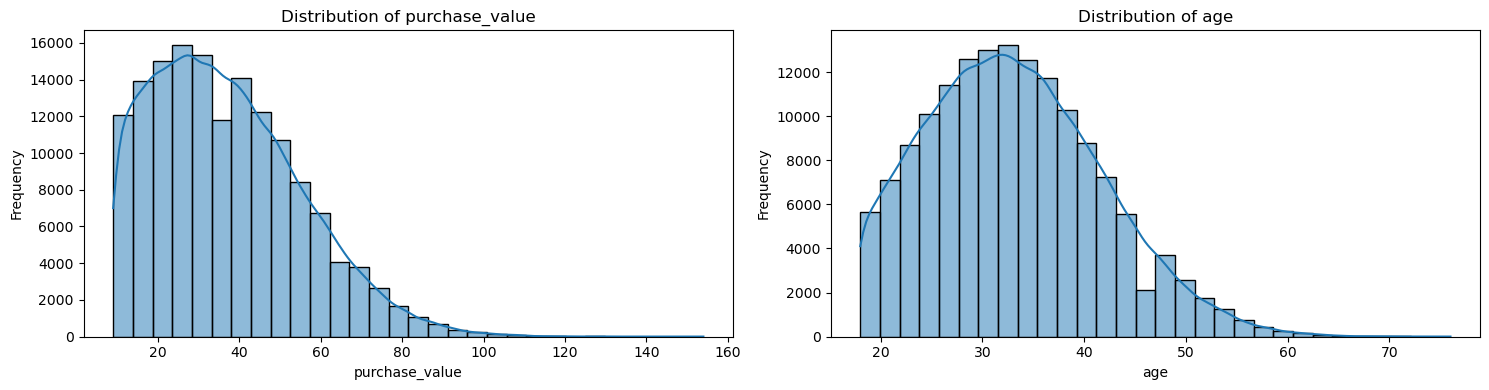

In [12]:
# Define numerical features
numerical_features = ['purchase_value', 'age']

# Define categorical features
categorical_features = ['source', 'browser', 'sex']

# Create instance of the DataVisualizer(df, target_col)
visualizer = DataVisualizer(fraud_df, numerical_features, categorical_features, 'class', logger)


visualizer._plot_histograms()  # To plot histograms

**Short Summary**

- Purchase Value Distribution: Right-skewed, with most values between 10 and 50.

- Age Distribution: Also right-skewed, with most individuals aged between 20 and 40.

- Skewness: Both distributions show a decline in frequency as values increase, indicating fewer high-value purchases and older individuals.

**Distrubution of categorical feature**

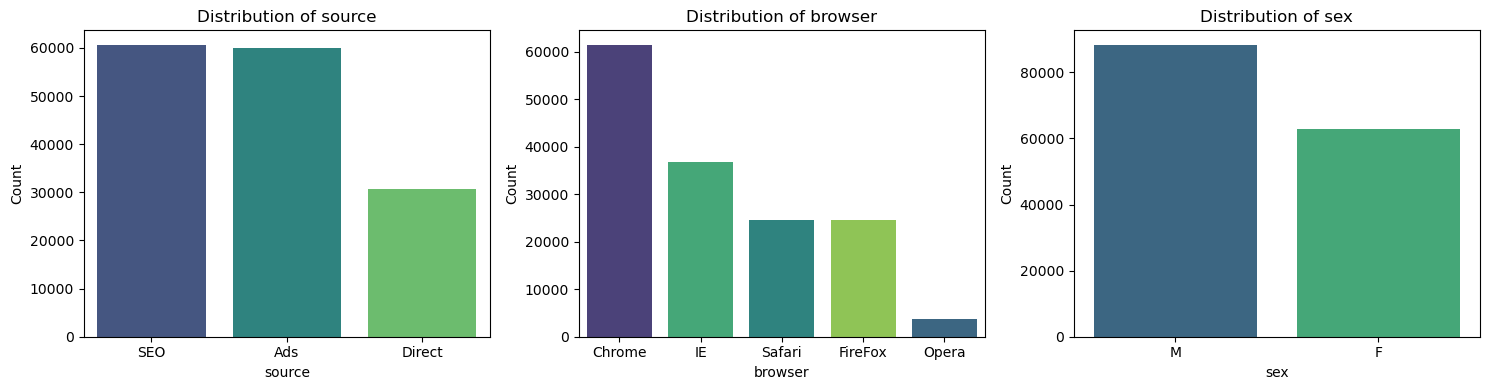

In [13]:
# Visualize the distribution
visualizer._plot_counts() # To plot counts for categorical features

**Short Summary**

- Source Distribution: SEO and Ads sources are almost equally common, each around 60,000 counts, while Direct traffic is significantly lower.

- Browser Distribution: Chrome is the most used browser, followed by Internet Explorer (IE). Safari, Firefox, and Opera have lower usage.

- Sex Distribution: Males (M) are more frequent than females (F), with around 90,000 males compared to 70,000 females.

- **Bivariate Analysis**

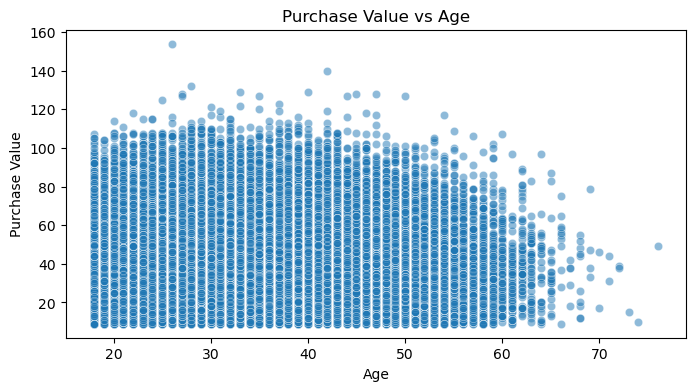

In [14]:
# Plot relationship between purchase_value vs age
visualizer.plot_relationship()

**Summary**

- Relationship: The scatter plot shows purchase value against age.

- Pattern: Purchase values are fairly consistent across ages 20 to 50, with values spread between 20 and 140.

- Decline: For ages above 50, purchase values gradually decrease, indicating fewer high-value purchases among older individuals.

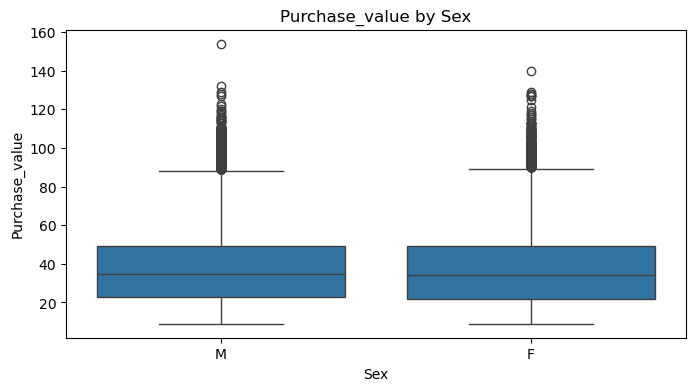

In [15]:
# Boxplot for purchase_value by sex
visualizer._boxplot('sex', 'purchase_value')

**Summary**

- Relationship: The box plot compares purchase values between two sexes: male (M) and female (F).
- Pattern: The median purchase value is similar for both males and females. However, the distribution of purchase values differs:

    - Males: The distribution is slightly wider, with a few outliers indicating higher purchase values.

    - Females: The distribution is more concentrated around the median, with fewer outliers, suggesting a more consistent spending pattern.

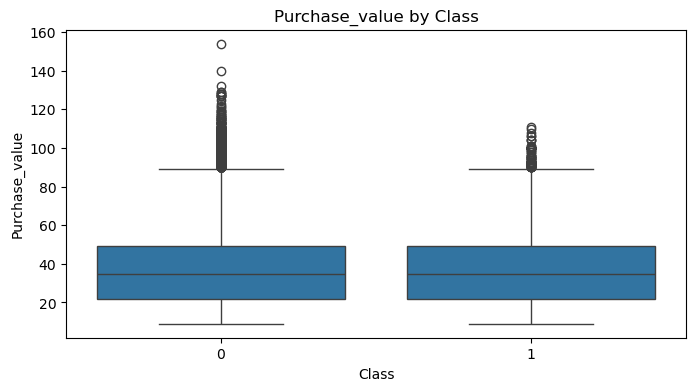

In [16]:
# Boxplot for purchase_value grouped by class
visualizer._boxplot('class', 'purchase_value')

**Summary**
- Non-Fraud(0): Wider distribution with a few outliers indicating higher purchase values

- Fraud(1): More concentrated distribution around the median, with fewer outliers, suggesting consistent spending.

- **_Conclusion_**: The median purchase values are similar, but class 0 shows a broader range of spending, with some individuals making significantly higher purchases than those in class 1.

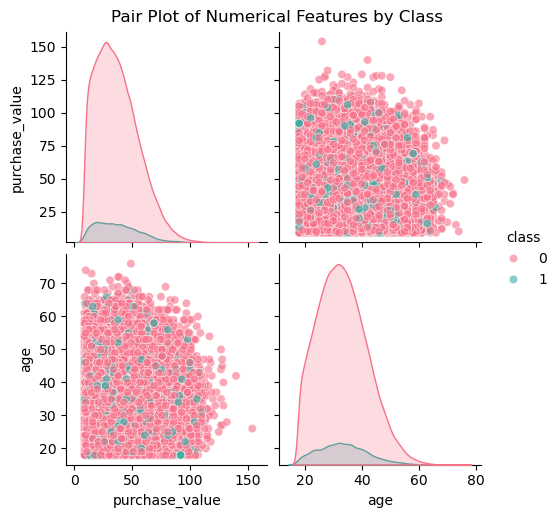

In [17]:
# Pairwise relationship
visualizer.plot_pairwise_relationships()

**Key Insights**
- High overlap in purchase value distributions between classes 0(Non-Fraud) and 1(Fraud) suggests that purchase value alone may not effectively predict class.
- The considerable overlap in age distributions for classes 0(Non-Fraud) and 1(Fraud) implies that age may not be a strong predictor of class either.
- _Conclusion:_ The scatter plot indicates a weak positive correlation, suggesting older individuals tend to make slightly higher purchases on average. However, this relationship is not particularly strong.

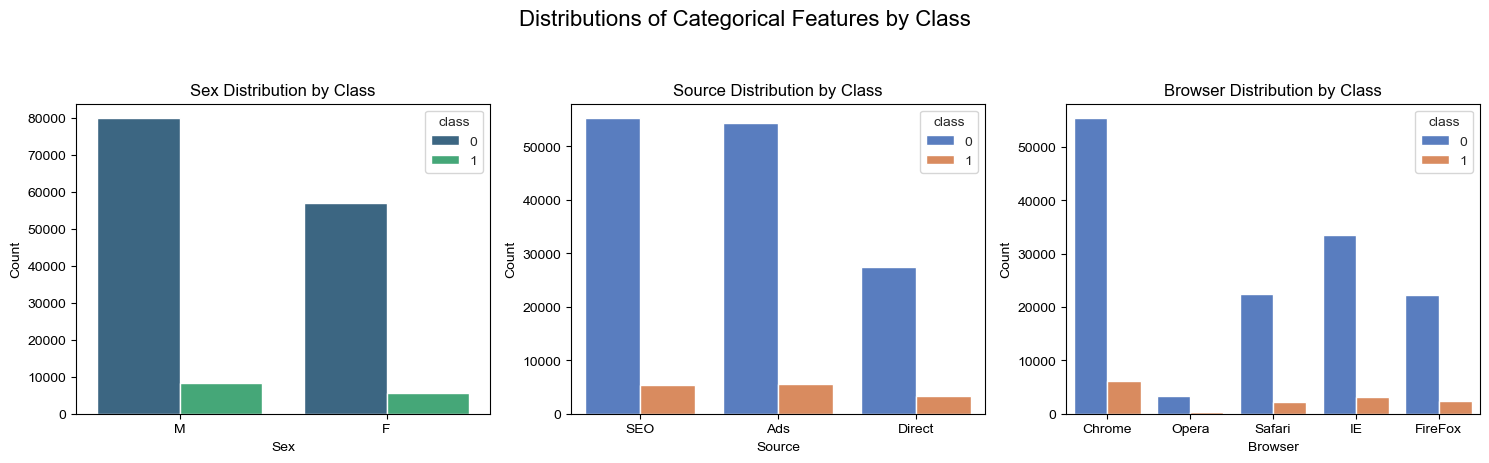

In [18]:
# plot the distribution of categorical feature variables by target variable
visualizer.plot_distribution_by_class()

**Key Insights**

- _Sex Distribution:_

    - Class 0: Higher proportion of males (M) compared to females (F).
    - Class 1: More balanced distribution, with a slight majority of females.
- _Source Distribution:_

    - Class 0: Predominantly from organic search (SEO), followed by paid advertising (Ads).
    - Class 1: More balanced across sources, with a slight preference for direct traffic.
- _Browser Distribution:_

    - Class 0: Popular browsers include Chrome, IE, and Safari.
    - Class 1: More concentrated usage of Chrome, with fewer users on Opera and Safari.
- **_Conclusion_**

    - Sex: May be moderately informative; the distribution differences suggest it could aid in predicting the target variable.

    - Source: Likely less informative; high overlap in distributions indicates it may not be a strong predictor.

    - Browser: Could be a potentially informative feature; differences in usage suggest a relationship with class that might be explored further.

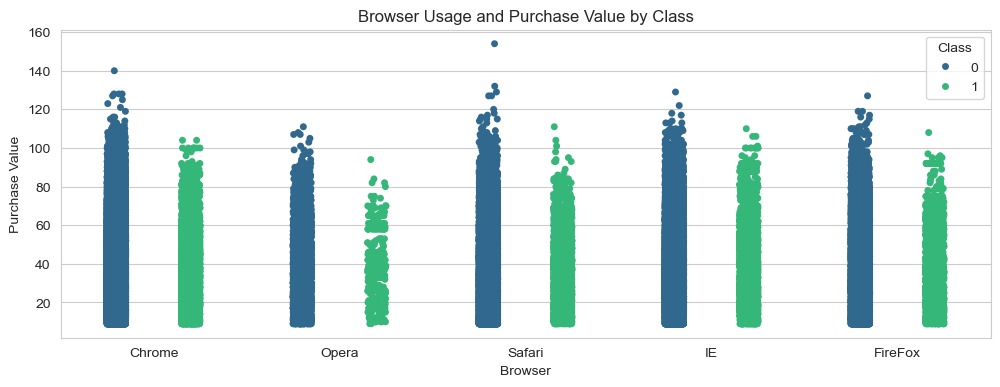

In [19]:
# Browser usage and Purchase value distribution by target variable
visualizer.plot_browser_usage()

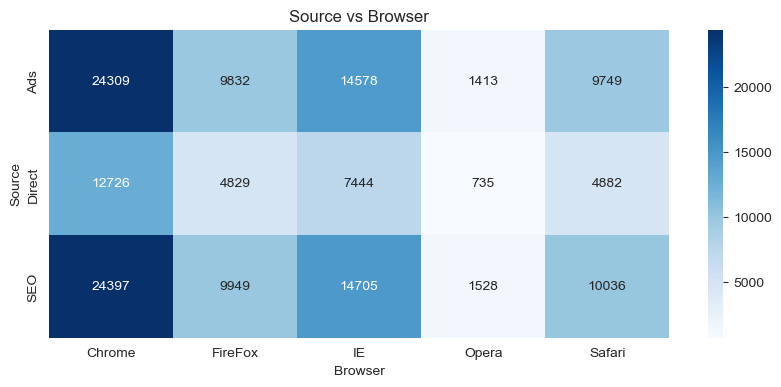

In [20]:
# Cross-tabulation and heatmap for source and browser
visualizer.plot_source_vs_browser_heatmap()

**Summary**

- Chrome is the most popular browser across all sources.
- SEO is the dominant traffic source for most browsers.
- Ads and Direct traffic are more common for Chrome and IE, while Firefox, Opera, and Safari rely mainly on SEO.

In [21]:
# Source, Browser, and class hierarchy
visualizer.plot_sunburst_chart()

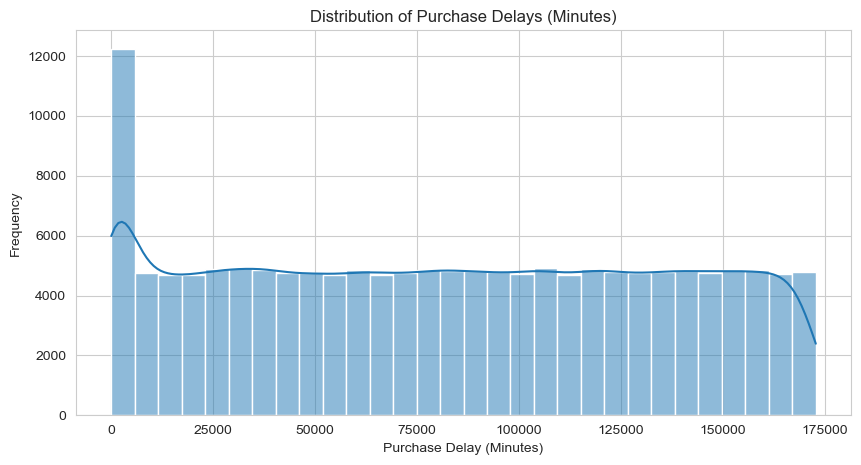

In [22]:
# User purchase analysis
visualizer.plot_purchase_delay_distribution()

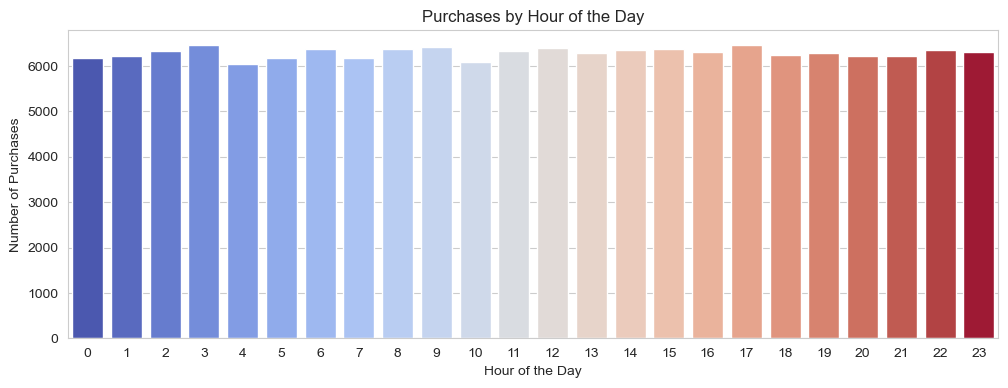

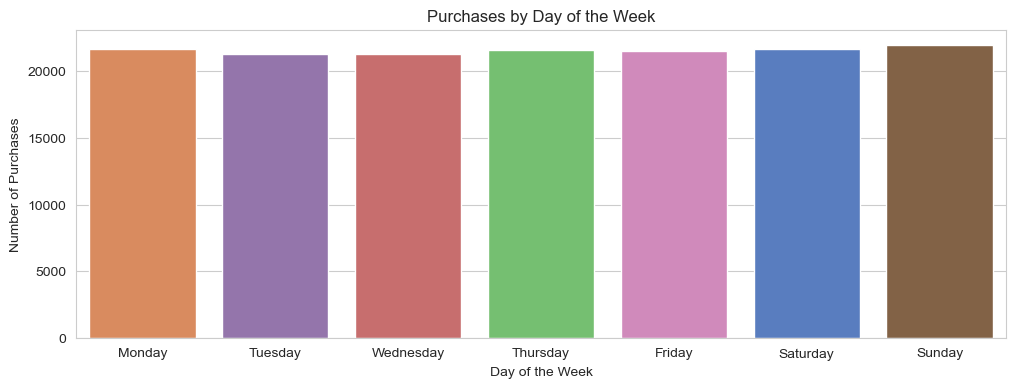

In [23]:
# Purchase pattern over time
visualizer.plot_purchase_patterns_over_time()

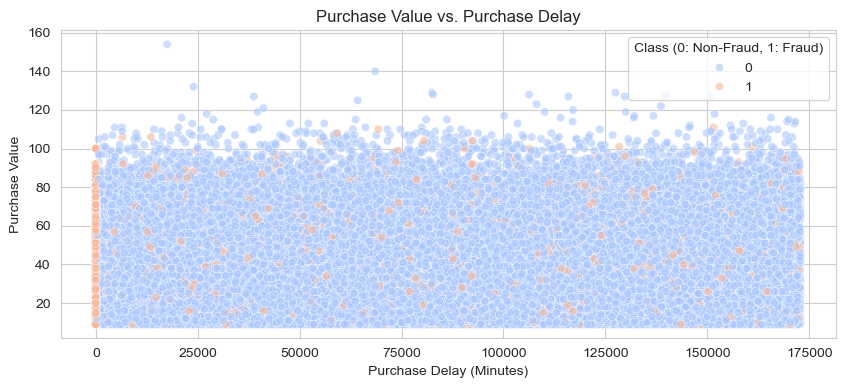

In [24]:
# Correlation between purchase delay and purchase value
visualizer.plot_purchase_value_vs_delay()

**Summary**

- Purchase value and purchase delay do not provide a reliable basis for predicting fraud.
- Additional features, such as transaction history or customer information, are likely needed for accurate classification.
- Outliers may indicate fraudulent activity; further investigation into these outliers could reveal patterns associated with fraud.

#### Geolocation Analysis
**Merge Datasets for Geolocation Analysis**

- Convert IP addresses to integer format
- Merge Fraud_Data.csv with IpAddress_to_Country.csv

In [25]:
def ip_to_int(ip):
    """Convert an IP address to its integer representation."""
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None  # Handle invalid IPs gracefully



In [26]:
# Load the datasets
fraud_data = fraud_df.copy()
ip_country_data = pd.read_csv('../data/IpAddress_to_Country.csv')

In [27]:
ip_country_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [28]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667,2,Saturday
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667,1,Monday
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667,18,Thursday
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667,13,Monday
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667,18,Wednesday


In [29]:
# Convert IP addresses in fraud data to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(lambda x: ip_to_int(str(int(x))) if not pd.isna(x) else None)



In [30]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,hour_of_day,day_of_week,ip_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667,2,Saturday,732758368
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667,1,Monday,350311387
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667,18,Thursday,2621473820
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667,13,Monday,3840542443
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667,18,Wednesday,415583117


In [31]:
# Drop rows with invalid IPs
fraud_data.dropna(subset=['ip_int'], inplace=True)

# Convert bounds in the country data to integer
fraud_data["ip_int"] = fraud_data["ip_int"].astype("int64")
ip_country_data["lower_bound_ip_address"] = ip_country_data["lower_bound_ip_address"].astype("int64")



In [32]:
ip_country_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


In [33]:
# Sort both datasets for merge_asof
fraud_data.sort_values('ip_int', inplace=True)
ip_country_data.sort_values('lower_bound_ip_address', inplace=True)



In [34]:
# Merge the datasets using merge_asof
merged_data = pd.merge_asof(
    fraud_data,
    ip_country_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)



In [35]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,hour_of_day,day_of_week,ip_int,lower_bound_ip_address,upper_bound_ip_address,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,29383.566667,10,Sunday,52093,NaN,NaN,NaN
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,18080.383333,17,Friday,93447,NaN,NaN,NaN
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,12488.666667,8,Tuesday,105818,NaN,NaN,NaN
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,123910.566667,21,Thursday,117566,NaN,NaN,NaN
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,23460.316667,7,Sunday,131423,NaN,NaN,NaN


In [36]:
# Filter rows where ip_int is within the lower and upper bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_address']) &
                          (merged_data['ip_int'] <= merged_data['upper_bound_ip_address'])]

# Drop unnecessary columns
merged_data.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)




In [37]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_delay,hour_of_day,day_of_week,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,60536.916667,3,Sunday,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,20527.283333,20,Wednesday,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,33292.233333,23,Saturday,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,127348.283333,16,Saturday,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,170826.316667,4,Tuesday,16971984,Thailand


In [38]:
# Save to csv file for later
merged_data.to_csv('../data/merged_fraud_data.csv')


In [39]:
merged_data['class'].value_counts()

class
0    116878
1     12268
Name: count, dtype: int64

<Figure size 1400x700 with 0 Axes>

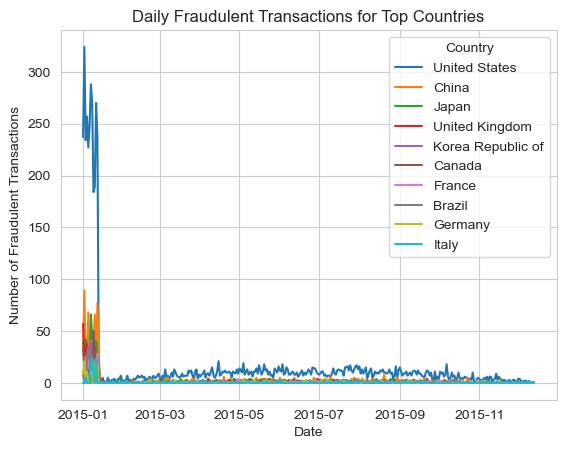

In [40]:
# Convert 'purchase_time' to datetime format
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Group fraudulent transactions by day and country
daily_fraud = merged_data[merged_data['class'] == 1].groupby([merged_data['purchase_time'].dt.date, 'country']).size().unstack().fillna(0)

# Determine the top countries with the highest number of fraudulent transactions
top_countries = daily_fraud.sum().nlargest(10).index

# Plotting fraud trends over time for the top countries
plt.figure(figsize=(14, 7))
daily_fraud[top_countries].plot()
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')
plt.show()

**Load the World GeoDataFrame**

- Load the world shapefile containing geometries and country names:
- Download a Complete Shapefile:

    - To get a shapefile that includes country names, download the appropriate dataset from Natural Earth. Use the following link to get the 110m Cultural Vectors dataset, which includes country names.

In [41]:
fraud_data_path = '../data/merged_fraud_data.csv'
world_data_path = '../data/ne_110m_admin_0_countries.shp'

# Load your data as DataFrames
fraud_data = pd.read_csv(fraud_data_path)
world_data = gpd.read_file(world_data_path)



In [42]:
# Initialize the class with DataFrames and the logger
geo_analyzer = GeolocationAnalyzer(fraud_df=fraud_data, 
                                   world_gdf=world_data, 
                                   logger=logger)



In [43]:
geo_analyzer.analyze()

**Calculate Transaction Volumes by Country**

In [44]:
# Calculate total transaction volumes by country
highestTranscation = geo_analyzer.calculate_transaction_volume()

highestTranscation.sort_values(by='transaction_volume', ascending=False).head(10)

,country,transaction_volume
0,United States,58049
1,China,12038
2,Japan,7306
3,United Kingdom,4490
4,Korea Republic of,4162
5,Germany,3646
6,France,3161
7,Canada,2975
8,Brazil,2961
9,Italy,1944


In [45]:
# Visualize the transaction volume in each contry in the world
# For transaction volume map
geo_analyzer.plot_transaction_volume_map()

**Summary**

- Dominance of the U.S.: The United States has a significantly higher transaction volume compared to other countries, indicating a robust e-commerce market.

- China and Japan's Influence: China and Japan also show substantial transaction volumes, suggesting strong consumer engagement in these markets.

**Fraud Rate by Country**

In [46]:
# Calculate total and fraudulent transactions by country
fraude_rate = geo_analyzer.calculate_fraud_rate()
fraude_rate.sort_values(by='fraud_rate', ascending=False).head(10)

,country,fraud_rate
166,Madagascar,1.000000
115,Albania,0.434783
154,Gibraltar,0.419355
98,Trinidad and Tobago,0.388889
177,South Sudan,0.333333
51,Philippines,0.264151
164,Vanuatu,0.262712
131,Afghanistan,0.260504
20,Poland,0.245283
89,Sudan,0.233333


In [47]:
# Visualize the fraudelents countires in the world
# Save the fraud rate map as a static image
# For fraud rate map
geo_analyzer.plot_fraud_rate_map()

**Summary**

- Significant Fraud Concentration: Madagascar has an alarming 100% fraud rate, indicating all recorded transactions are fraudulent, which may signal critical vulnerabilities in transaction security or monitoring.

- Regional Patterns of Concern: Countries like Albania (43.48%), Gibraltar (41.94%), and Trinidad and Tobago (38.89%) exhibit high fraud rates, suggesting systemic issues that require urgent attention and improved security measures.

- Need for Enhanced Security: Nations such as the Philippines (26.42%), Vanuatu (26.27%), and Afghanistan (26.05%) show substantial fraud rates, highlighting the necessity for strengthened digital security infrastructure and proactive fraud detection strategies.